In [1]:
import sys
#sys.path.insert(0, '../..')
from IPython import get_ipython
from IPython.lib.deepreload import reload

%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
from ocean3d import load_obs_data
from ocean3d import check_variable_name
from ocean3d import stratification
from ocean3d.ocean_circulation.multi_model.mld_spatial import mld_multi_model
from aqua.util import load_yaml

In [2]:
en4_reader = Reader(model='EN4', exp='en4', source="monthly")
en4_1 = en4_reader.retrieve(startdate="1990", enddate="1993")
en4_1 = check_variable_name(en4_1)
en4_2 = en4_reader.retrieve(startdate="2010", enddate="2013")
en4_2 = check_variable_name(en4_2)


ifs_nemo_historical_reader = Reader(model='IFS-NEMO', exp='historical-1990', source="lra-r100-monthly")
ifs_nemo_historical = ifs_nemo_historical_reader.retrieve(startdate="1990", enddate="1993")
ifs_nemo_historical = check_variable_name(ifs_nemo_historical)

ifs_nemo_ssp370_reader = Reader(model='IFS-NEMO', exp='ssp370', source="lra-r100-monthly")
ifs_nemo_ssp370 = ifs_nemo_ssp370_reader.retrieve(startdate="2020", enddate="2023")
ifs_nemo_ssp370 = check_variable_name(ifs_nemo_ssp370)

icon_ssp370_reader = Reader(model='ICON', exp='ssp370', source="lra-r100-monthly")
icon_ssp370 = icon_ssp370_reader.retrieve(startdate="2000", enddate="2023")
icon_ssp370 = check_variable_name(icon_ssp370)

icon_historical_reader = Reader(model='ICON', exp='historical-1990', source="lra-r100-monthly")
icon_historical = icon_historical_reader.retrieve(startdate="1990", enddate="1993")
icon_historical = check_variable_name(icon_historical)


2024-03-25 19:04:24 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-03-25 19:04:27 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable time_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lon_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lat_bnds has no units!
2024-03-25 19:04:27 :: Reader :: ERROR    -> Variable lev_bnds has no units!
2024-03-25 19:04:27 :: Unit :: WARNING  -> The unit of Pot. Temperature is Kelvin. Converting to degC
2024-0

In [3]:
data_dict = {'EN4 1':en4_1,
             'EN4 2':en4_2,
             'IFS-NEMO Historical':ifs_nemo_historical,
             'IFS-NEMO ssp370':ifs_nemo_ssp370,
             'icon ssp370':icon_ssp370,
             'icon Historical':icon_historical,
             } 
o3d_request= {'model':'IFS-NEMO',
'exp':'historical-1990',
'source': 'lra-r100-monthly',
'data_dict': data_dict,
'region':'Labrador Sea',
'latS':None,
'latN':None,
'lonW':None,
'lonE':None,
'output':True,
"time" : "February",
'output_dir':'./output'}

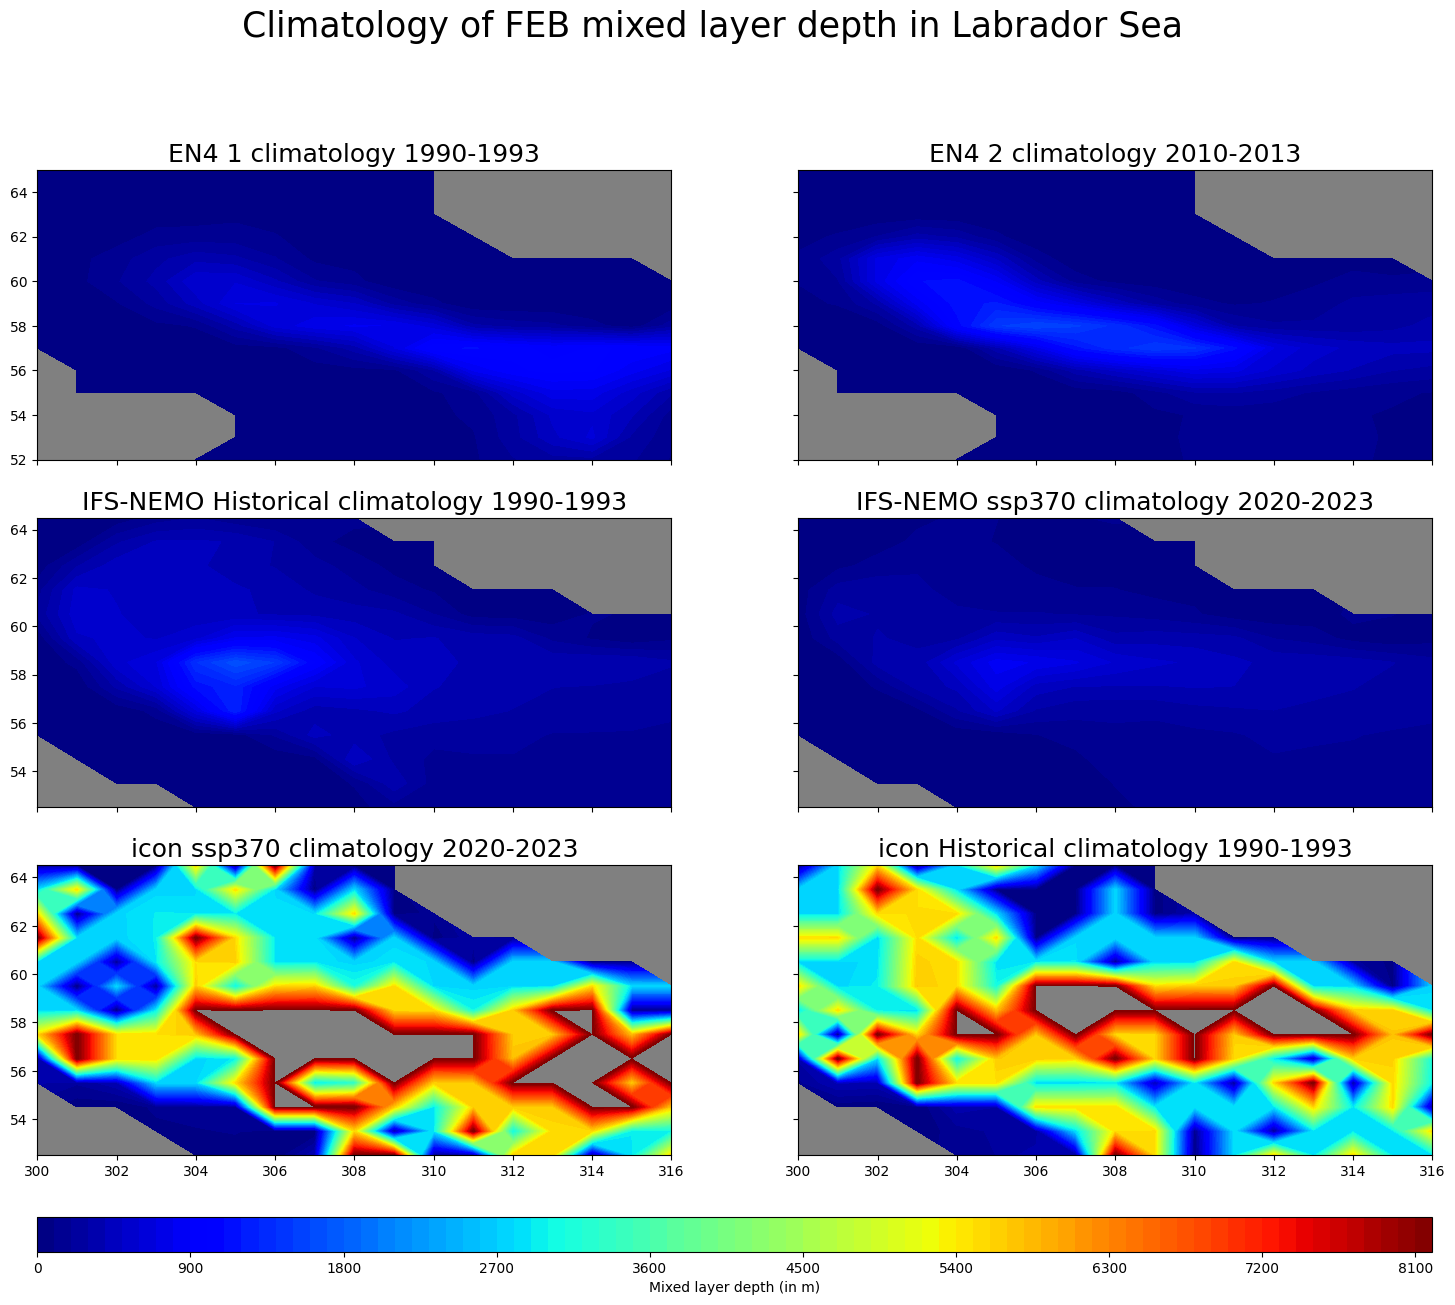

In [20]:
mld_multi_model(o3d_request)

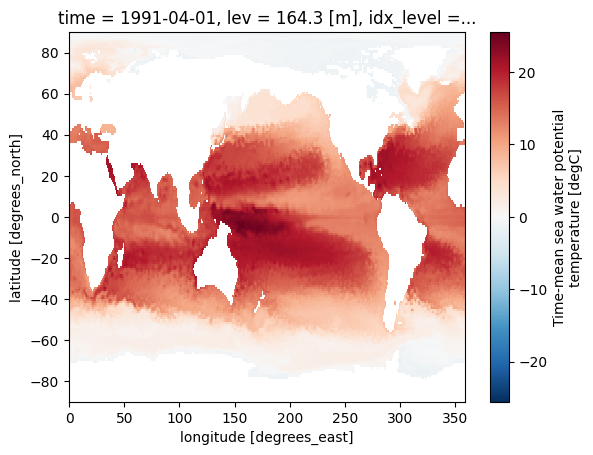

In [19]:
icon_historical.avg_thetao[15][30].plot()


In [15]:
ifs_nemo_historical.avg_so.attrs


{'GRIB_paramId': 263500,
 'long_name': 'Time-mean sea water practical salinity',
 'GRIB_stepUnits': 1,
 'GRIB_gridDefinitionDescription': '150',
 'GRIB_typeOfLevel': 'oceanModelLayer',
 'standard_name': 'unknown',
 'GRIB_gridType': 'healpix',
 'GRIB_cfName': 'unknown',
 'GRIB_stepType': 'avg',
 'GRIB_cfVarName': 'avg_so',
 'GRIB_numberOfPoints': 196608,
 'GRIB_name': 'Time-mean sea water practical salinity',
 'units': 'g kg**-1',
 'GRIB_missingValue': 9999,
 'history': '\n2024-01-17 23:12:13 AQUA💧: resampled from frequency 24.0 h to frequency 1M by AQUA timmean;\n2024-01-17 23:12:43 AQUA💧: Regrid from nemo-hpz7-nested-3d to r100;\n2024-01-17 23:12:43 AQUA💧: regridded from nemo-hpz7-nested-3d to r100 and from frequency 24.0 to monthly through LRA generator;\n',
 'GRIB_NV': 0,
 'gridtype': 'healpix',
 'GRIB_shortName': 'avg_so',
 'GRIB_units': 'g kg**-1',
 'GRIB_dataType': 'fc'}